# Mini project 

### -> covers the topics learned from day 01 to day 11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## House Price Prediction using Linear Algebra

### Note : This code involves synthetic data and does not integrate real life dataset


In [2]:
# Generate Synthetic Data

np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # House sizes (in 1000 sq ft)
y = 50 + 25 * X + np.random.randn(100, 1) * 5  # Prices with noise

# Add intercept term for bias
X_b = np.c_[np.ones((100, 1)), X]

# Least Squares Solution (Projections)

# θ = (X^T X)^(-1) X^T y
theta_ls = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print("Theta (Least Squares):", theta_ls.flatten())
print()

# Predictions
y_pred_ls = X_b @ theta_ls

#  Eigenvalues & Variance (PCA concept)

cov_matrix = np.cov(X_b.T)
eigvals, eigvecs = np.linalg.eig(cov_matrix)
print("Eigenvalues (Variance):", eigvals)


# Gradient Descent Solution

def gradient_descent(X, y, lr=0.1, n_iter=500):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    history = []
    for i in range(n_iter):
        gradients = 2/m * X.T @ (X @ theta - y)
        theta -= lr * gradients
        loss = np.mean((X @ theta - y)**2)
        history.append(loss)
    return theta, history

theta_gd, loss_history = gradient_descent(X_b, y)
print("Theta (Gradient Descent):", theta_gd.flatten())
print()

# Predictions using Gradient Descent
y_pred_gd = X_b @ theta_gd



Theta (Least Squares): [51.07548079 23.85056693]

Eigenvalues (Variance): [0.        0.3539998]
Theta (Gradient Descent): [51.07548023 23.85056742]



## Visualizations:

### 1) Regression Lines

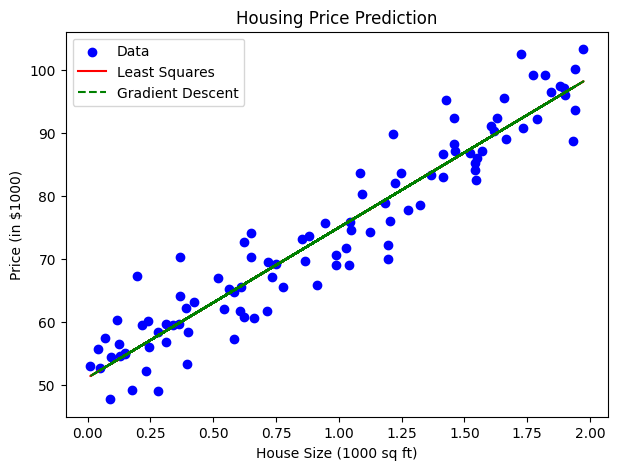

In [3]:
plt.figure(figsize=(7,5))
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, y_pred_ls, "r-", label="Least Squares")
plt.plot(X, y_pred_gd, "g--", label="Gradient Descent")
plt.xlabel("House Size (1000 sq ft)")
plt.ylabel("Price (in $1000)")
plt.title("Housing Price Prediction")
plt.legend()
plt.show()



### 2) Loss Surface Visualization

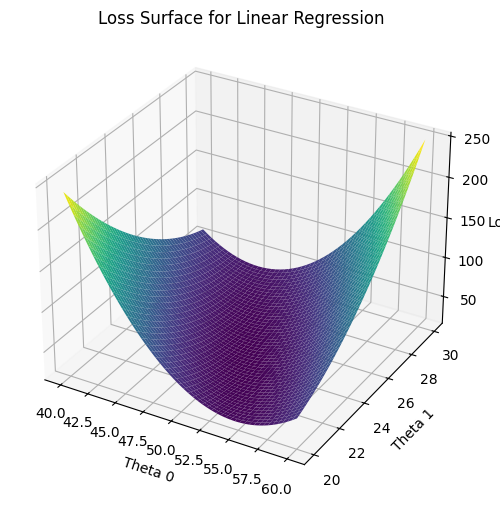

In [4]:
theta0_vals = np.linspace(40, 60, 50)
theta1_vals = np.linspace(20, 30, 50)
loss_surface = np.zeros((len(theta0_vals), len(theta1_vals)))

for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        y_pred = t0 + t1 * X
        loss_surface[i, j] = np.mean((y - y_pred)**2)

T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, loss_surface.T, cmap='viridis')
ax.set_xlabel("Theta 0")
ax.set_ylabel("Theta 1")
ax.set_zlabel("Loss")
ax.set_title("Loss Surface for Linear Regression")
plt.show()



### 3) Loss history in Gradient Descent

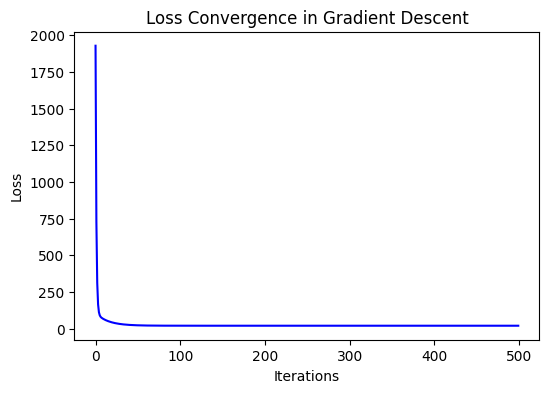

In [5]:
plt.figure(figsize=(6,4))
plt.plot(loss_history, 'b-')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Convergence in Gradient Descent")
plt.show()